In [48]:
#Lan 2 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)


In [49]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

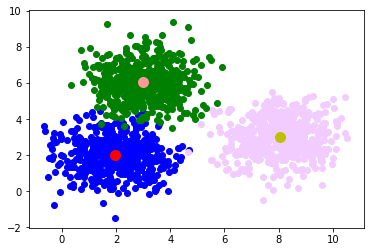

In [59]:
def kmeans_display(X, label, centers):
    K = np.amax(label) + 1
    a = centers[-1]
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.scatter(X0[:, 0], X0[:, 1], color = 'b')
    plt.scatter(X1[:, 0], X1[:, 1], color = '#f2ccff' )
    plt.scatter(X2[:, 0], X2[:, 1], color = 'g')
    
    # center
    plt.scatter(a[0,0], a[0,1], s = 99, color = '#ff9999')
    plt.scatter(a[1,0], a[1,1], s = 99, color = 'r')
    plt.scatter(a[2,0], a[2,1], s = 99, color = 'y')
kmeans_display(X, original_label, centers)

In [60]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [61]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[1.97563391 2.01568065]
 [8.0410628  3.02094748]
 [2.99634182 6.03964618]]


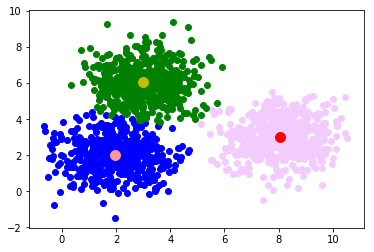

In [62]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])
a = centers[-1]



kmeans_display(X, labels[-1], centers)

